# COVID PROJECT

## INITIAL STEPS AND DATA IMPORT

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import folium
from folium.plugins import HeatMap
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
files = os.listdir('D:\Desktop\proyectos udemi\covid\Covid-19')
files

['country_wise_latest.csv',
 'covid_19_clean_complete.csv',
 'day_wise.csv',
 'full_grouped.csv',
 'usa_country_wise.csv',
 'worldometer_data.csv']

In [3]:
path = 'D:\Desktop\proyectos udemi\covid\Covid-19'

In [4]:
def read_data(path,filename):
    return pd.read_csv(path + '/' + filename)

In [5]:
#We can call the file names with indexing as well
day_wise_data = read_data(path, files[2])
day_wise_data.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [6]:
world_data = read_data(path, 'worldometer_data.csv')
world_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [7]:
group_data = read_data(path, files[3])
group_data.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [8]:
usa_data = read_data(path, files[4])
usa_data.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0


In [9]:
province_data = read_data(path, files[1])
province_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


## Which Country has the most total cases, deaths, recovered & active cases?

In [10]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [33]:
#looks like USA is leading!
columns = ['TotalDeaths','TotalCases','TotalRecovered','ActiveCases']
for col in columns:
    fig = px.treemap(data_frame=world_data,values = col, path=['Country/Region'], title='Cases, deaths, recovers and active cases per country')
fig.show()

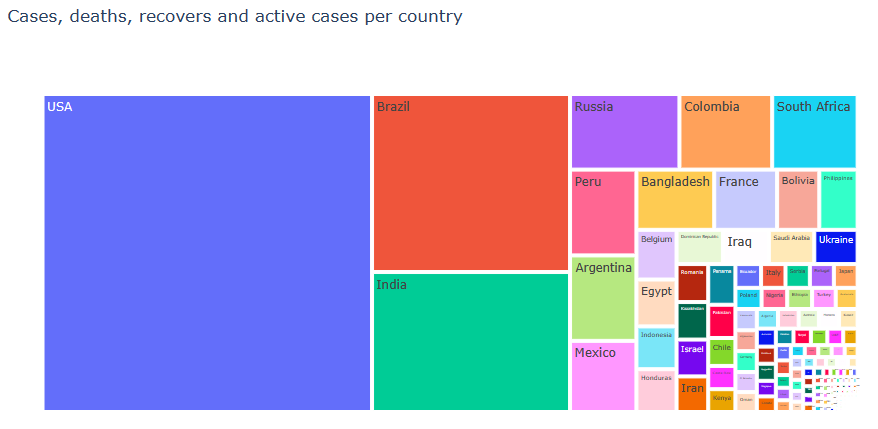

## What is the trend of confirmed cases, deaths, recovered active cases

In [12]:
day_wise_data.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

In [13]:
px.line(data_frame=day_wise_data, x ='Date', y= ['Confirmed', 'Deaths', 'Recovered', 'Active'],template='plotly_dark', title='covered cases with respective date')

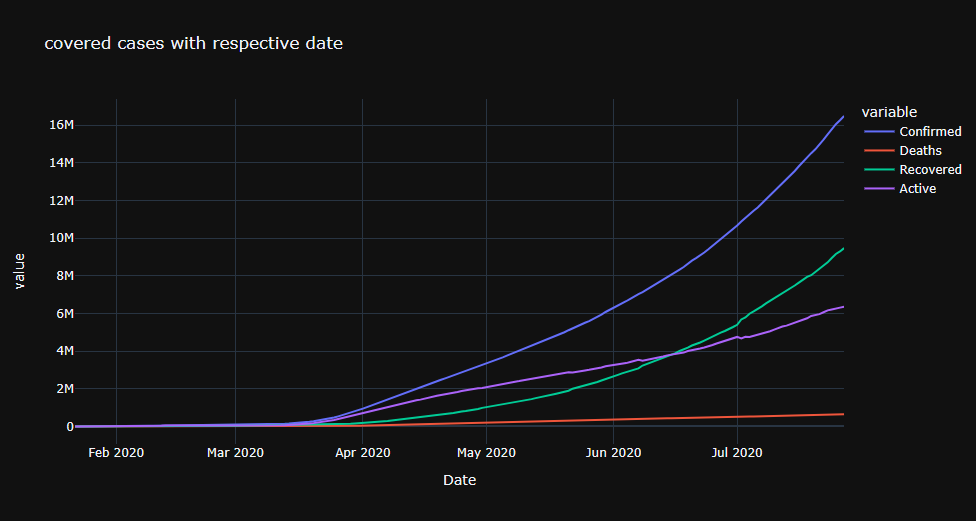

## PERFORM EDA ON DATA

In [14]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

### Which country did more tests in proportion?

In [15]:
pop_test = world_data['TotalTests']/world_data['Population'].iloc[0:20]

In [16]:
fig = px.bar(world_data.iloc[0:20],x='Country/Region', y = pop_test[0:20], color = 'Country/Region', title='Pop test ratio')
fig.show()

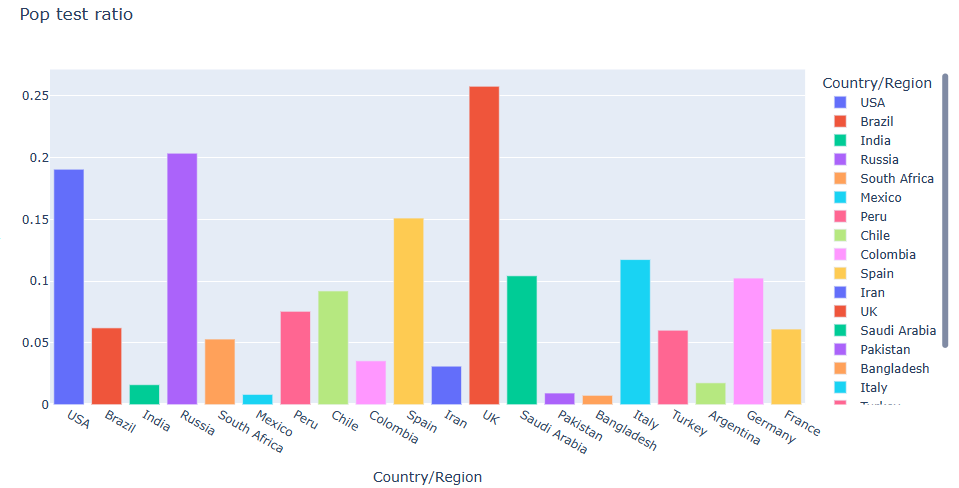

## TOP 20 COUNTRIES AFFECTED BY CORONA

In [17]:
px.bar(world_data.iloc[0:20], x = 'Country/Region', y =['Serious,Critical','TotalDeaths','TotalRecovered','ActiveCases','TotalCases'] )

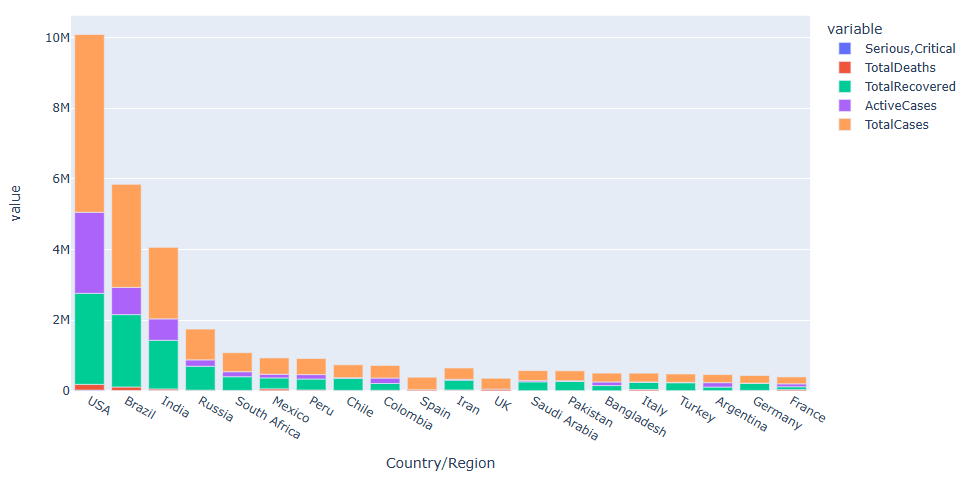

## ANALYSING COUNTRIES THAT ARE BADLY AFFECTED BY CORONA

### WORST 20 COUNTRIES HAVING MAX. CONFIRMED CASES

In [18]:
fig = px.bar(world_data.iloc[0:20], y = 'Country/Region', x ='TotalCases', text='TotalCases', color = 'TotalCases' )
fig.update_layout(template = 'plotly_dark', title_text = 'top 20 countries with cases')
fig.show()

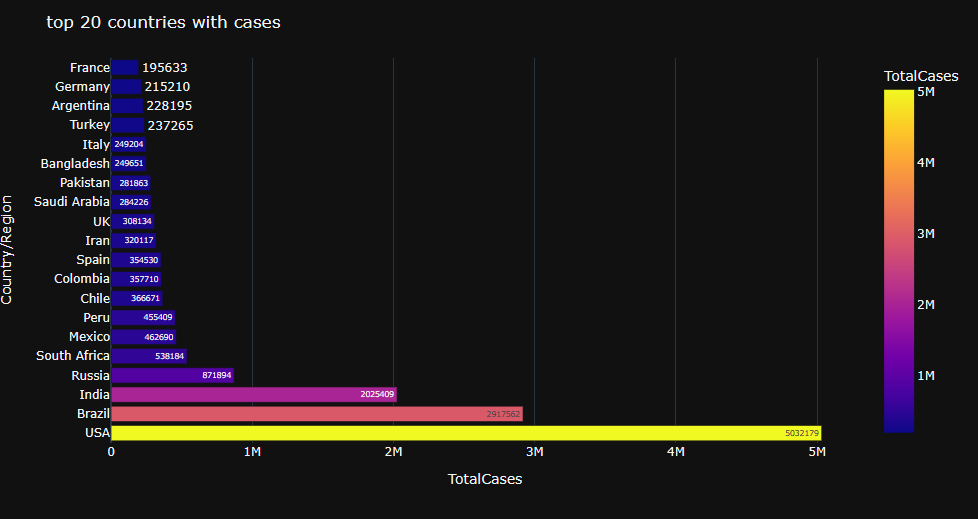

### WORST 20 COUNTRIES HAVING MAX. CONFIRMED DEATHS

In [19]:
fig = px.bar(world_data.sort_values(by='TotalDeaths', ascending=False).iloc[0:20], y = 'Country/Region', x ='TotalDeaths', text='TotalDeaths', color = 'TotalDeaths' )
fig.update_layout(template = 'plotly_dark', title_text = 'top 20 countries with TotalDeaths')
fig.show()

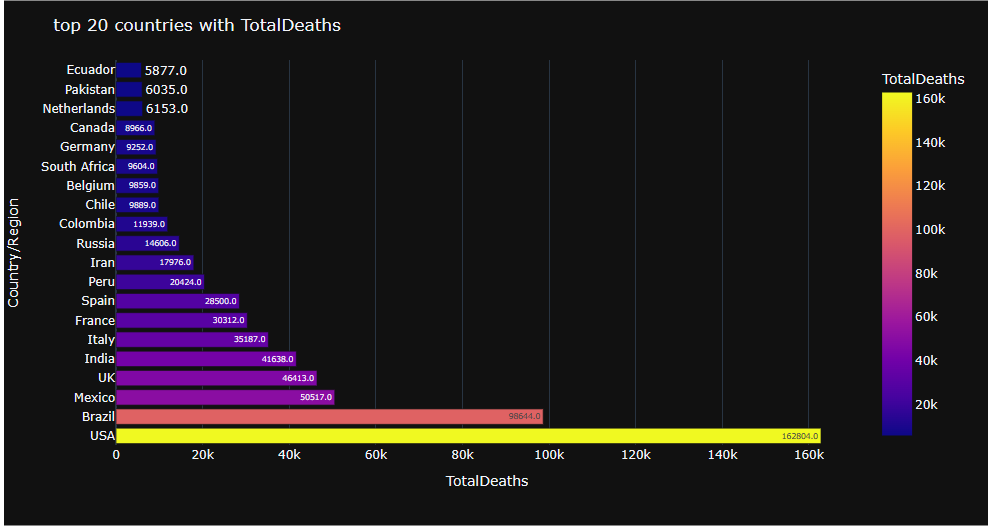

### WORST 20 COUNTRIES HAVING MAX. ACTIVE CASES

In [20]:
fig = px.bar(world_data.sort_values(by='ActiveCases', ascending=False).iloc[0:20], y = 'Country/Region', x ='ActiveCases', text='ActiveCases', color = 'ActiveCases' )
fig.update_layout(template = 'plotly_dark', title_text = 'top 20 countries with ActiveCases')
fig.show()

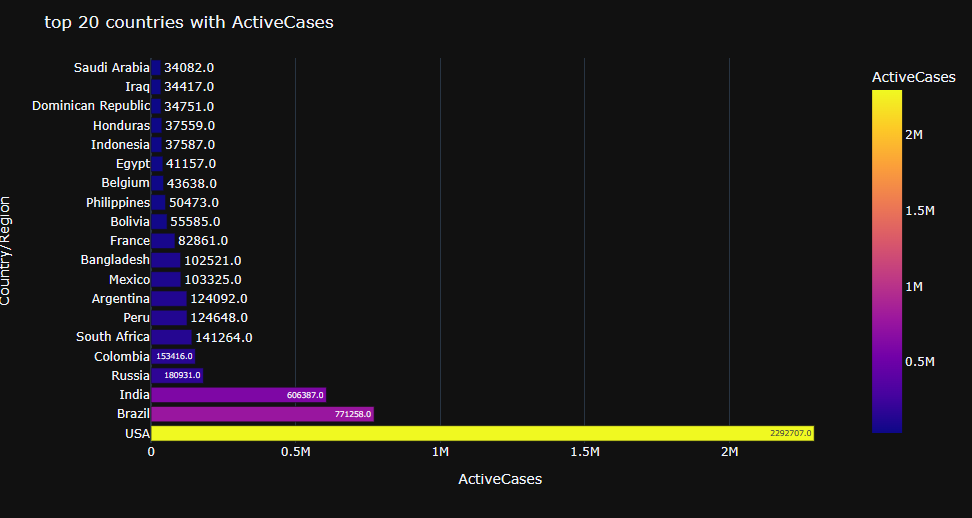

### WORST 20 COUNTRIES HAVING MAX. RECOVERED CASES

In [21]:
fig = px.bar(world_data.sort_values(by='TotalRecovered', ascending=False).iloc[0:20], y = 'Country/Region', x ='TotalRecovered', text='TotalRecovered', color = 'TotalRecovered' )
fig.update_layout(template = 'plotly_dark', title_text = 'top 20 countries with TotalRecovered')
fig.show()

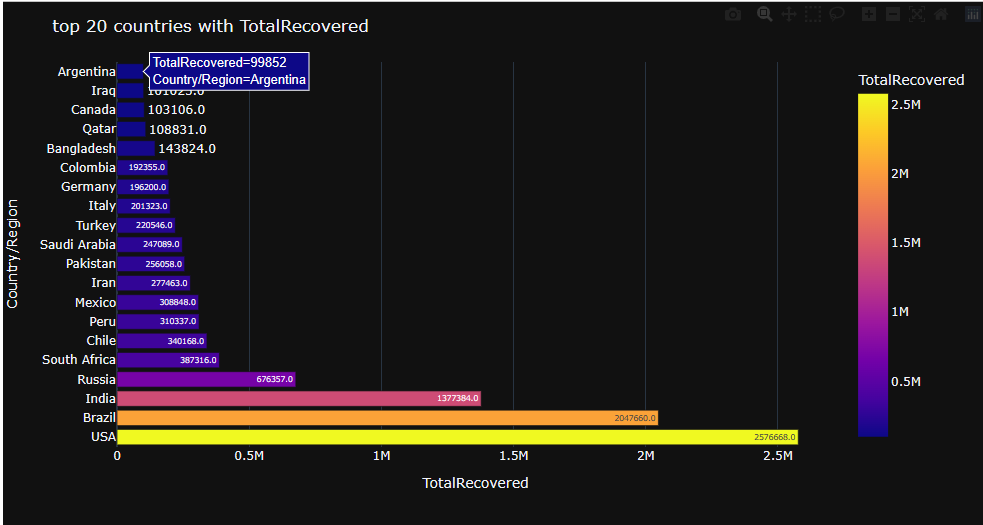

## PERFORM IN DEPTH ANALYSIS

In [22]:
labels = world_data[0:15]['Country/Region'].values
columns = ['TotalDeaths','TotalCases','TotalRecovered','ActiveCases']
for col in columns:
    fig = px.pie(data_frame=world_data[0:15],values = col, names= labels, hole = 0.3, title = 'Recorded {} worst cases'.format(col))
fig.show()

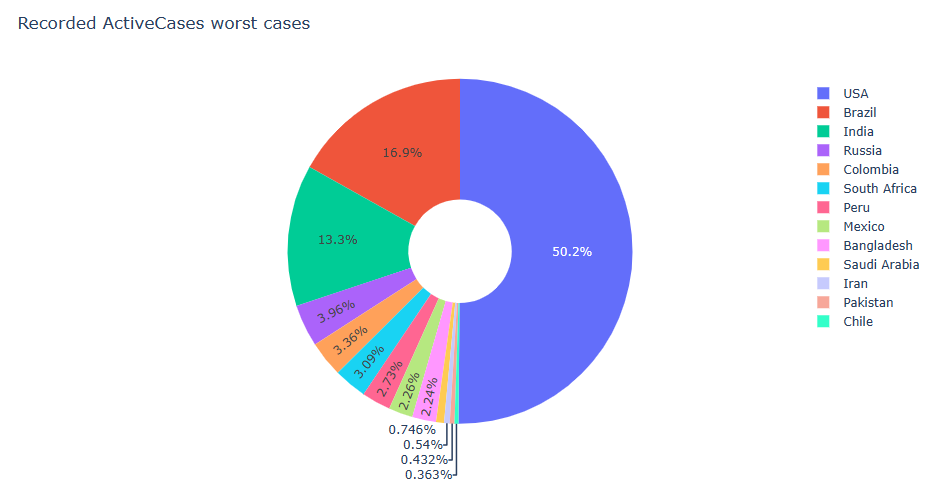

In [23]:
deaths_to_confirmed = world_data['TotalDeaths']/world_data['TotalCases']
deaths_to_confirmed

0      0.032353
1      0.033810
2      0.020558
3      0.016752
4      0.017845
         ...   
204    0.076923
205         NaN
206         NaN
207         NaN
208    0.100000
Length: 209, dtype: float64

In [24]:
px.bar(world_data, x = 'Country/Region', y = deaths_to_confirmed, title = 'Deaths confirmed ratio for most affected countries')

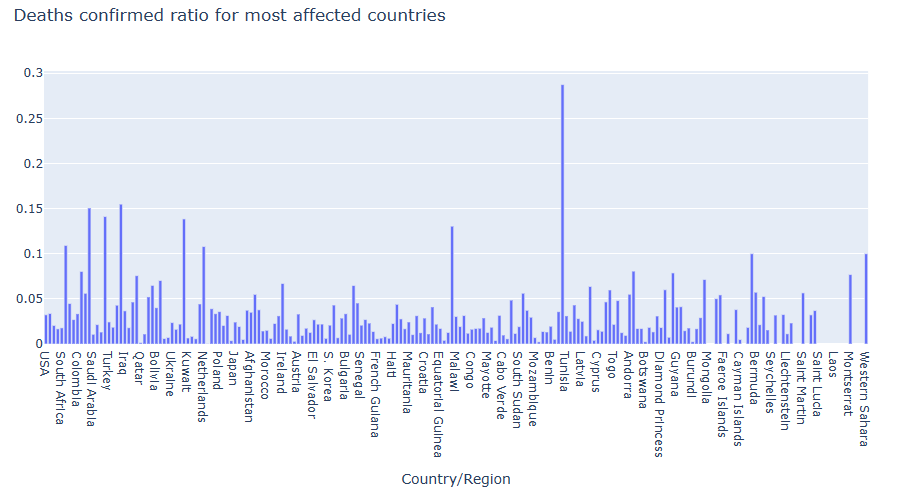

In [25]:
deaths_to_recovered = world_data['TotalDeaths']/world_data['TotalRecovered']
deaths_to_recovered

0      0.063184
1      0.048174
2      0.030230
3      0.021595
4      0.024796
         ...   
204    0.100000
205         NaN
206         NaN
207         NaN
208    0.125000
Length: 209, dtype: float64

In [26]:
px.bar(world_data, x = 'Country/Region', y = deaths_to_recovered, title = 'Deaths confirmed ratio for most affected countries')

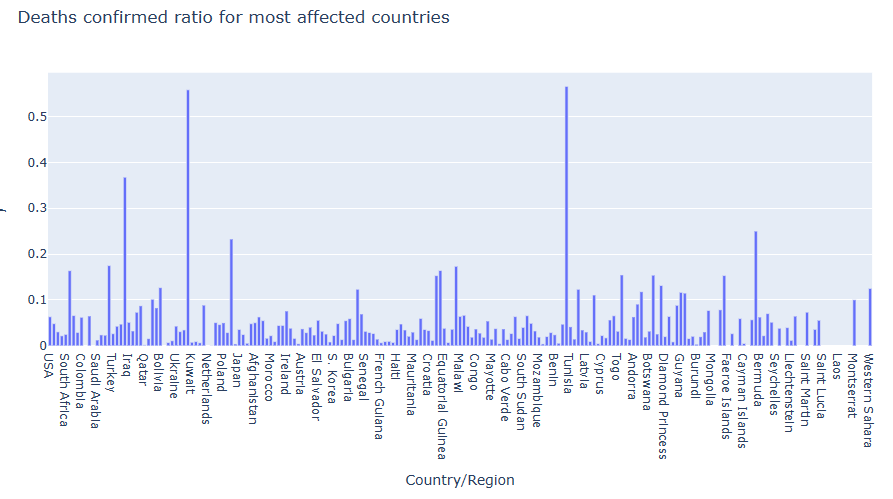

In [27]:
deaths_to_serious = world_data['TotalDeaths']/world_data['Serious,Critical']
deaths_to_serious

0       8.898338
1      11.859101
2       4.655411
3       6.350435
4      17.818182
         ...    
204          NaN
205          NaN
206          NaN
207          NaN
208          NaN
Length: 209, dtype: float64

In [28]:
px.bar(world_data, x = 'Country/Region', y = deaths_to_serious, title = 'Serious to death ratio')

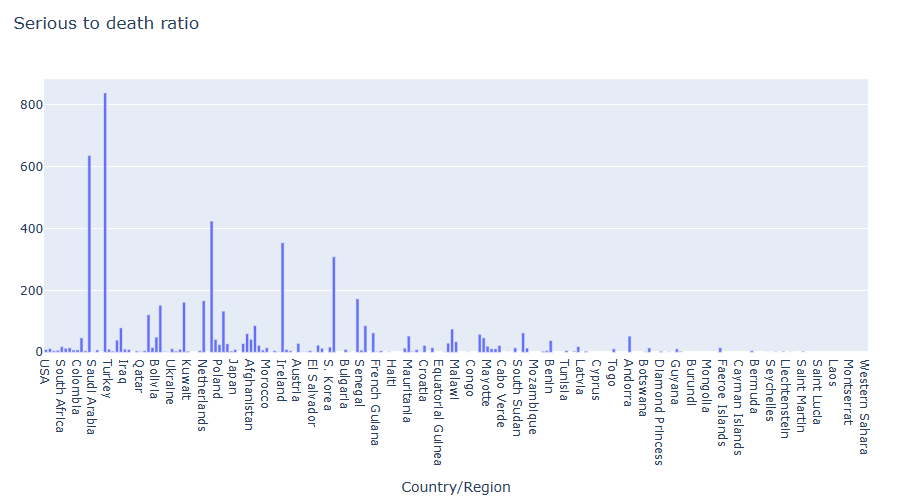

## AUTOMATE THE ANALYSIS

In [29]:
group_data.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [30]:
def country_visualization(df, country):
    data = df[df['Country/Region'] == country]
    
    # Esto parece una selección de columnas, pero no estás asignando el resultado a una variable.
    # Debes asignar esta selección a una variable para usarla en los gráficos.
    data2 = data.loc[:, ['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
    
    # Crear un subplot con cuatro gráficos
    fig = make_subplots(rows=1, cols=4, subplot_titles=('Confirmed', 'Active', 'Recovered', 'Deaths'))
    
    # Agregar un gráfico de dispersión para 'Confirmed'
    fig.add_trace(
        go.Scatter(name='Confirmed', x=data2['Date'], y=data2['Confirmed']),
        row=1, col=1
    )
    
    # Agregar un gráfico de dispersión para 'Active'
    fig.add_trace(
        go.Scatter(name='Active', x=data2['Date'], y=data2['Active']),
        row=1, col=2
    )
    
    # Agregar un gráfico de dispersión para 'Recovered'
    fig.add_trace(
        go.Scatter(name='Recovered', x=data2['Date'], y=data2['Recovered']),
        row=1, col=3
    )
    
    # Agregar un gráfico de dispersión para 'Deaths'
    fig.add_trace(
        go.Scatter(name='Deaths', x=data2['Date'], y=data2['Deaths']),
        row=1, col=4
    )
    
    fig.update_layout(height=600, width=1000, title_text='Recorded cases of {}'.format(country), template='plotly_dark')
    fig.show()
    

In [31]:
country_visualization(group_data,'Spain')

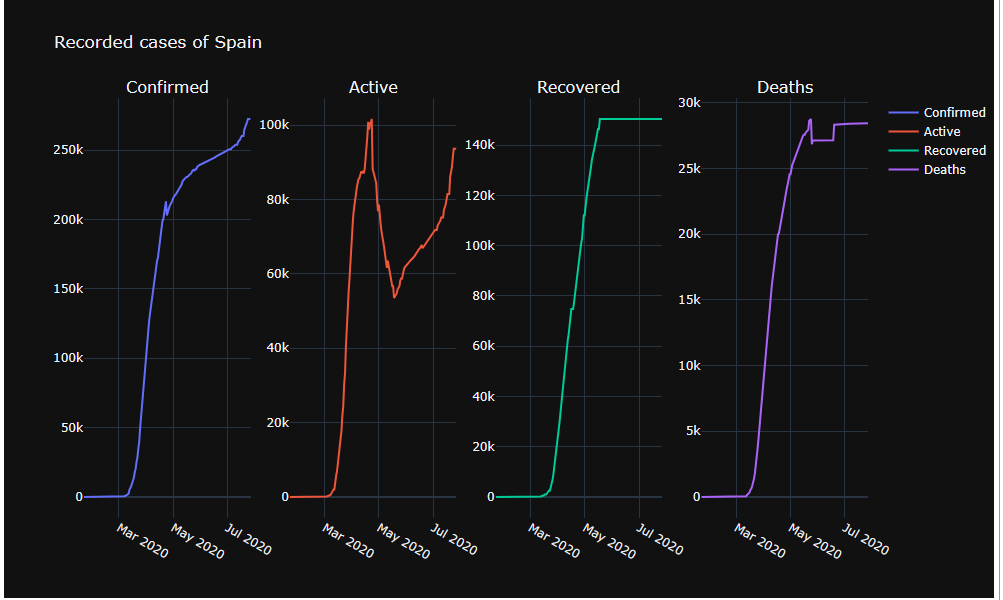

In [32]:
country_visualization(group_data,'Germany')

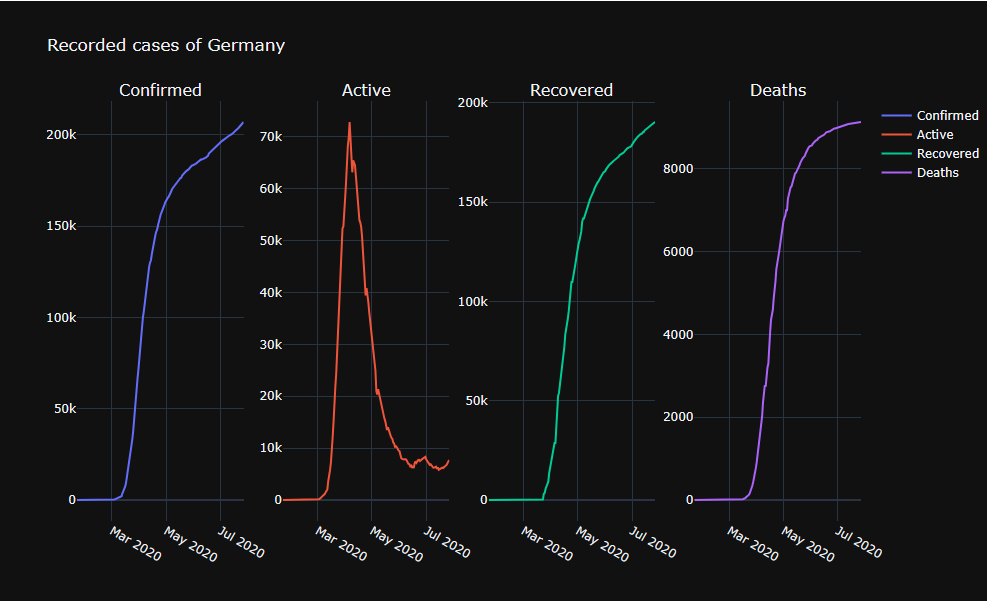